In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)
np.set_printoptions(suppress=True, precision = 3)

In [3]:
training_data = pd.read_csv('./Data/cell2celltrain.csv')
testting_data = pd.read_csv('./Data/cell2cellholdout.csv')

In [4]:
df = training_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

We have 51k rows of data here and 57 columns!

In [5]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
# let's see summary of the dataset
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.105e+04,50891.000,50891.000,50891.000,50891.000,50891.000,50891.000,50680.000,50680.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51047.000,51046.000,51046.000,51046.000,50138.000,50138.000,51047.000,51047.000,51047.000,51047.000,51047.000
mean,3.202e+06,58.834,525.653,46.830,0.895,40.028,1.236,-11.548,-1.192,6.011,4.086,28.289,1.869,0.299,114.800,25.378,8.178,90.550,67.651,10.158,0.012,1.841,18.756,1.532,1.354,1.806,1.559,380.546,31.338,21.144,0.037,0.018,0.052,4.325,0.054
std,1.169e+05,44.507,529.871,23.849,2.229,96.588,9.818,257.515,39.575,9.044,10.947,38.876,5.096,1.168,166.486,35.209,16.666,104.947,92.753,15.555,0.594,5.585,9.800,1.223,0.675,1.331,0.906,253.802,22.095,23.931,0.206,0.142,0.308,3.138,0.383
min,3.000e+06,-6.170,0.000,-11.000,0.000,0.000,0.000,-3875.000,-1107.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,1.000,0.000,1.000,1.000,-5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.101e+06,33.610,158.000,30.000,0.000,0.000,0.000,-83.000,-7.100,0.700,0.000,5.300,0.000,0.000,8.300,3.300,0.000,23.000,11.000,1.700,0.000,0.000,11.000,1.000,1.000,1.000,1.000,205.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.202e+06,48.460,366.000,45.000,0.250,3.000,0.000,-5.000,-0.300,3.000,1.000,16.300,0.000,0.000,52.800,13.700,2.000,62.000,35.700,5.300,0.000,0.300,16.000,1.000,1.000,1.000,1.000,329.000,36.000,0.000,0.000,0.000,0.000,5.000,0.000
75%,3.305e+06,71.065,723.000,60.000,0.990,41.000,0.300,66.000,1.600,7.700,3.700,36.300,1.700,0.300,153.500,34.000,9.300,121.300,88.700,12.300,0.000,1.300,24.000,2.000,2.000,2.000,2.000,515.000,48.000,42.000,0.000,0.000,0.000,7.000,0.000
max,3.400e+06,1223.380,7359.000,400.000,159.390,4321.000,1112.400,5192.000,2483.500,221.700,384.300,848.700,327.300,66.000,2692.400,644.300,519.300,2090.700,1474.700,411.700,81.300,212.700,61.000,196.000,53.000,24.000,15.000,1812.000,99.000,99.000,4.000,3.000,35.000,9.000,25.000


# Data Preprocessing

## Dealing with Categorical Data

### Yes or No transformed to 1 or 0

From head(), we can see that some columns are having Yes or No values including our response variable, Churn. One thing we need to do is to transform these columns into having 1 or 0 values instead of Yes or No

In [7]:
df = df.replace({'Yes': 1, 'No': 0})
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,Known,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30,1,1-Highest,Suburban,Professional,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,Known,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30,0,4-Medium,Suburban,Professional,1
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,Unknown,0,0,0,0,0,1,0,0,1,0,0,6,0,0,Unknown,0,3-Good,Town,Crafts,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,Known,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10,0,4-Medium,Other,Other,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,Known,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10,0,1-Highest,Other,Professional,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

There are some object columns left. Let's check what they are and how to transform them

In [9]:
df[['CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 
        'HandsetPrice', 'Homeownership', 'ServiceArea']]

,CreditRating,PrizmCode,Occupation,MaritalStatus,HandsetPrice,Homeownership,ServiceArea
0,1-Highest,Suburban,Professional,0,30,Known,SEAPOR503
1,4-Medium,Suburban,Professional,1,30,Known,PITHOM412
2,3-Good,Town,Crafts,1,Unknown,Unknown,MILMIL414
3,4-Medium,Other,Other,0,10,Known,PITHOM412
4,1-Highest,Other,Professional,1,10,Known,OKCTUL918
...,...,...,...,...,...,...,...
51042,1-Highest,Suburban,Other,1,60,Known,LAXSFN818
51043,3-Good,Other,Other,0,60,Known,LAXCDG310
51044,5-Low,Other,Clerical,0,80,Known,LAXCDG310
51045,5-Low,Other,Other,0,30,Unknown,NEVPOW619


<AxesSubplot:>

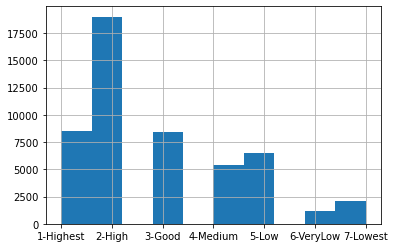

In [10]:
df['CreditRating'].sort_values().hist()

Credit rating already has the numerical representation of the rating. The smaller the value, the better is the credit

In [11]:
df['CreditRating'] = df['CreditRating'].apply(lambda x: x.split('-')[0]).astype(float)
df['CreditRating'].head()

0    1.0
1    4.0
2    3.0
3    4.0
4    1.0
Name: CreditRating, dtype: float64

<AxesSubplot:>

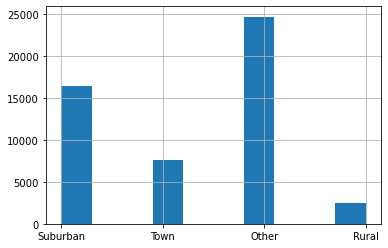

In [12]:
df['PrizmCode'].hist()

If we were to rank these values, we should rank town > Suburban > rural > other. Hence we would transform data in such an order

In [13]:
df['PrizmCode'] = df['PrizmCode'].replace({'Town': 1, 'Suburban': 2, 'Rural': 3, 'Other': 4})

In [14]:
df['Occupation'].value_counts()

Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64

We will use one-hot encoding here since we don't want to confuse our model with ordinality of the occupations

In [15]:
# one-hot encode occupation columns
df = pd.get_dummies(df, columns=["Occupation"], prefix=["Job_is"] )
df[['Job_is_Clerical', 'Job_is_Crafts', 'Job_is_Homemaker',
   'Job_is_Other', 'Job_is_Professional', 'Job_is_Retired', 
   'Job_is_Self', 'Job_is_Student']].tail()

,Job_is_Clerical,Job_is_Crafts,Job_is_Homemaker,Job_is_Other,Job_is_Professional,Job_is_Retired,Job_is_Self,Job_is_Student
51042,0,0,0,1,0,0,0,0
51043,0,0,0,1,0,0,0,0
51044,1,0,0,0,0,0,0,0
51045,0,0,0,1,0,0,0,0
51046,0,0,0,1,0,0,0,0


In [16]:
df['MaritalStatus'].value_counts()

Unknown    19700
1          18651
0          12696
Name: MaritalStatus, dtype: int64

It seems like unknown status is the only non-numerical value here. We are going to assume unknown = Single or unmarried, which is 0

In [17]:
df['MaritalStatus'] = df['MaritalStatus'].replace({'Unknown': 0})

'HandsetPrice', 'Homeownership', 'ServiceArea'

In [18]:
df['HandsetPrice'].value_counts()

Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: HandsetPrice, dtype: int64

Because the number of unknown here is quite a lot. We can't simply drop the rows that have unknown values. For now we will make the values become nan first and deal with them later. At feature selection part, we might not even use this column due to high amount of missing values and low predictive

In [19]:
df['HandsetPrice'] = df['HandsetPrice'].replace({'Unknown': np.nan}).astype(float)

In [20]:
df['Homeownership'].value_counts()

Known      33987
Unknown    17060
Name: Homeownership, dtype: int64

Homeownership values are just binary. So we will convert values into 1 or 0

In [21]:
df['Homeownership'] = df['Homeownership'].replace({'Unknown': 0, 'Known': 1})

In [22]:
df['ServiceArea'].value_counts()

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
PHISCR717       1
SFRWTV831       1
SFRRCM510       1
OHIOXF513       1
OMANEW515       1
Name: ServiceArea, Length: 747, dtype: int64

Due to the high diversity of data in service area, we can't use onehotencoder here. Label encoder is a better choice

In [23]:
le = LabelEncoder()
df['ServiceArea'] = le.fit_transform(df['ServiceArea'])
df['ServiceArea'].value_counts()

459    1684
229    1510
129    1498
465    1182
39      783
       ... 
439       1
375       1
261       1
23        1
527       1
Name: ServiceArea, Length: 748, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

All object columns are converted into either float or int

## Dealing with Missing Value

In [25]:
df.isnull().sum()[df.isnull().sum() > 0]

MonthlyRevenue             156
MonthlyMinutes             156
TotalRecurringCharge       156
DirectorAssistedCalls      156
OverageMinutes             156
RoamingCalls               156
PercChangeMinutes          367
PercChangeRevenues         367
Handsets                     1
HandsetModels                1
CurrentEquipmentDays         1
AgeHH1                     909
AgeHH2                     909
HandsetPrice             28982
dtype: int64

In [26]:
909/len(df)

0.017807118929613886

Besides HandsetPrice, the second highest missing values' columns are AgeHH1 and AgeHH2. Because we have a fairly large dataset for training this time, dropping 909 or more rows coming from other columns might not matter that much. 

Whereas for HandsetPrice, we will first drop this column and hypothesize that it's not useful feature for prediction.

Also, we might as well drop CustomerID at the same time since it is for sure not helpful in prediction later.

In [27]:
print('Before dropping, we have {} rows'.format(len(df)))
df2 = df.copy()
df2 = df.drop(columns=['HandsetPrice', 'CustomerID'])
df2 = df2.dropna()
print('After dropping missing values, we have {} rows'.format(len(df2)))

Before dropping, we have 51047 rows
After dropping missing values, we have 49776 rows


We only reduce 1271 rows only, which is still pretty okay in this case.

# Data Visualization

In [28]:
df2.shape

(49776, 63)

In [29]:
df2.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,MaritalStatus,Job_is_Clerical,Job_is_Crafts,Job_is_Homemaker,Job_is_Other,Job_is_Professional,Job_is_Retired,Job_is_Self,Job_is_Student
count,49776.000,49776.000,49776.000,49776.000,49776.000,49776.00,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000,49776.000
mean,0.286,58.720,525.078,46.835,0.892,39.76,1.226,-11.622,-1.168,6.011,4.080,28.292,1.876,0.298,114.725,25.357,8.165,90.451,67.728,10.152,0.012,1.837,18.730,1.529,1.351,351.623,1.805,1.559,380.001,31.342,21.151,0.247,0.139,0.903,0.191,0.083,0.678,0.368,0.384,0.015,0.057,0.189,0.688,0.035,0.018,0.193,0.138,0.051,4.403,0.014,0.054,0.033,2.864,2.855,0.372,0.020,0.030,0.003,0.733,0.175,0.015,0.018,0.008
std,0.452,44.315,528.509,23.759,2.225,96.08,9.846,255.844,39.393,9.036,10.838,38.857,5.121,1.171,166.103,35.031,16.585,104.585,92.744,15.457,0.582,5.590,9.738,1.226,0.668,204.241,1.331,0.906,252.270,22.089,23.926,0.431,0.346,0.297,0.393,0.276,0.467,0.482,0.486,0.122,0.233,0.391,0.463,0.202,0.143,0.395,0.345,0.266,3.110,0.116,0.383,0.178,1.568,1.176,0.483,0.139,0.171,0.056,0.443,0.380,0.120,0.131,0.087
min,0.000,-6.170,0.000,-6.000,0.000,0.00,0.000,-3875.000,-1107.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,1.000,0.000,0.000,1.000,1.000,-5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,33.610,158.000,30.000,0.000,0.00,0.000,-83.000,-7.000,0.700,0.000,5.300,0.000,0.000,8.500,3.300,0.000,23.300,11.000,2.000,0.000,0.000,11.000,1.000,1.000,163.000,1.000,1.000,205.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,48.380,366.000,45.000,0.250,3.00,0.000,-5.000,-0.300,3.000,1.000,16.300,0.000,0.000,52.900,13.700,2.000,62.000,35.700,5.300,0.000,0.300,16.000,1.000,1.000,343.000,1.000,1.000,330.000,36.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,2.000,3.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
75%,1.000,70.910,722.000,60.000,0.990,40.00,0.300,65.000,1.600,7.700,3.700,36.300,1.700,0.300,153.400,34.000,9.300,121.000,88.700,12.300,0.000,1.300,24.000,2.000,2.000,484.000,2.000,2.000,515.000,48.000,42.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,4.000,4.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.00

In [30]:
df2.Churn.value_counts()

0    35519
1    14257
Name: Churn, dtype: int64

We can see that non-churn data is a lot more than churn data. We will use undersampler later to deal with the imbalanced dataset

## Correlation Analysis
Since we have many columns, we will split the features to pair it with churn for correlation analysis

<AxesSubplot:>

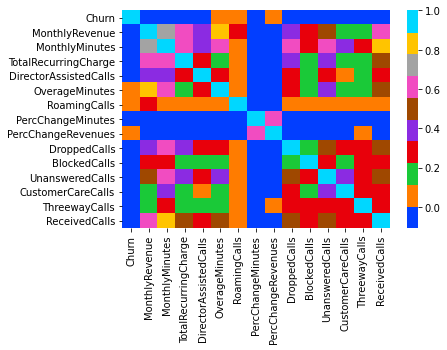

In [31]:
colors = sns.color_palette("bright", as_cmap=True)
sns.heatmap(df2.iloc[:, 0:15].corr(), cmap=colors)

Most are having no correlation with churn, but OverageMinutes, RoamingCalls, PercChangeRevenues show some relation with churn

<AxesSubplot:>

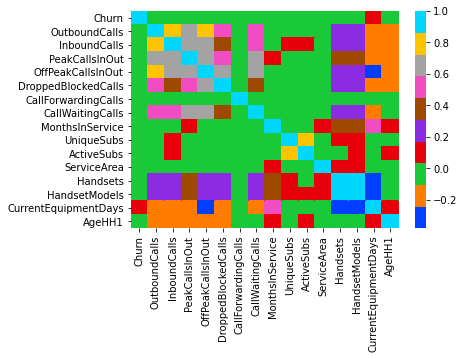

In [32]:
sns.heatmap(pd.concat([df2.iloc[:, 0], df2.iloc[:, 15:30]], axis=1)
            .corr(), cmap=colors)

CurrentEquipmentDays shows some correlation with churn

<AxesSubplot:>

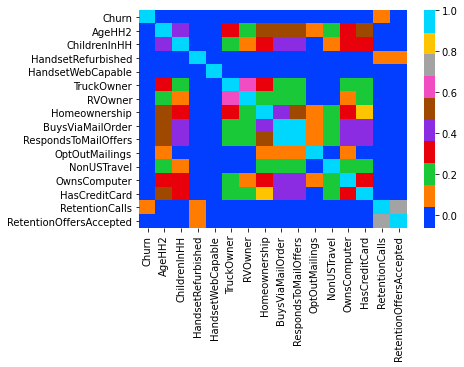

In [33]:
sns.heatmap(pd.concat([df2.iloc[:, 0], df2.iloc[:, 30:45]], axis=1)
            .corr(), cmap=colors)

RetentionCalls shows some correlation with churn

<AxesSubplot:>

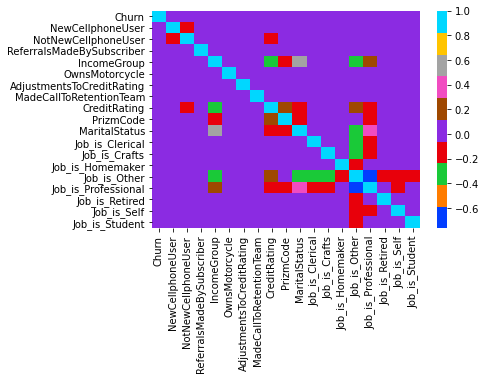

In [34]:
sns.heatmap(pd.concat([df2.iloc[:, 0], df2.iloc[:, 45:63]], axis=1)
            .corr(), cmap=colors)

No strong relationship identified

Overall: OverageMinutes, RoamingCalls, PercChangeRevenues, RetentionCalls, CurrentEquipmentDays show some correlation with churn

## Pair Plot
Since we have a lot of rows and columns, we will just visualize a few columns with churn for analysis here

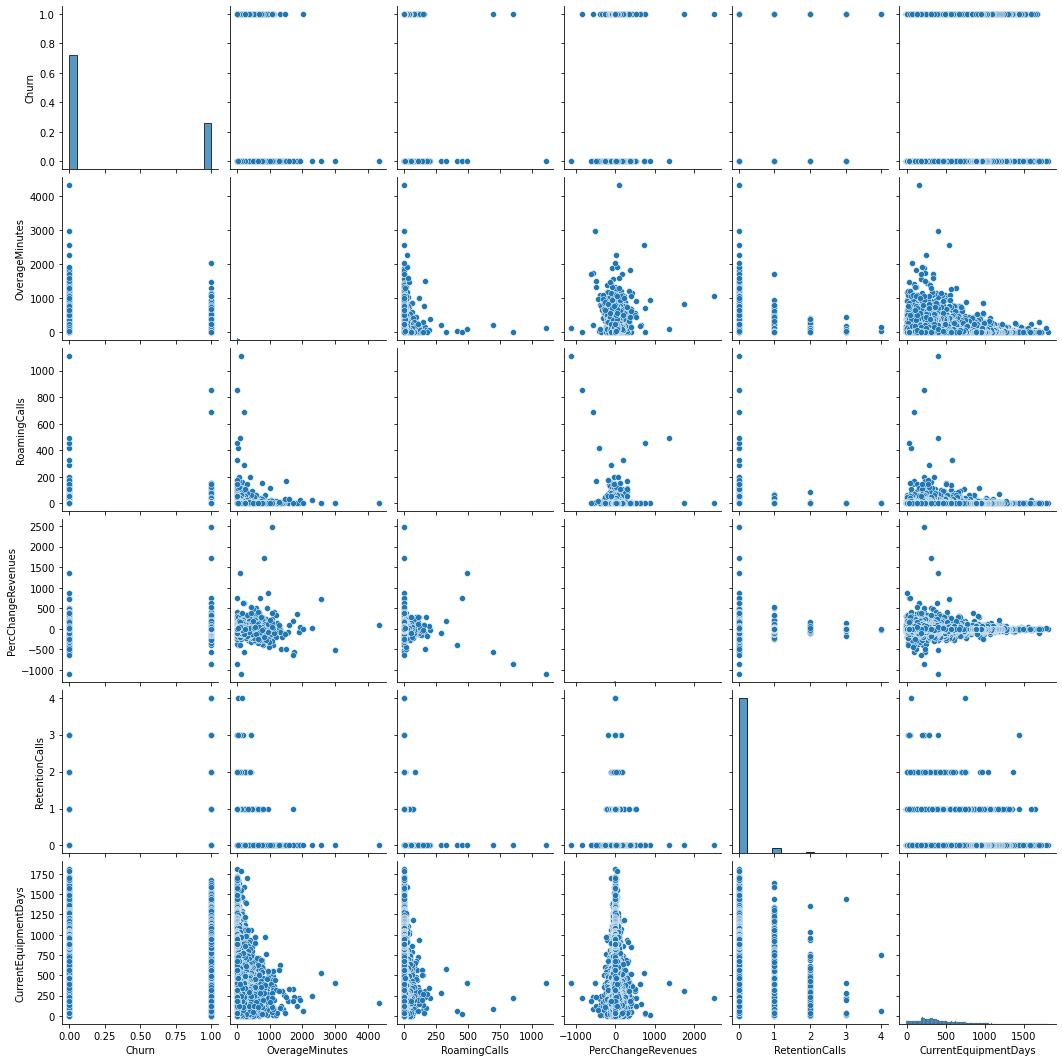

In [35]:
sns.pairplot(df2[['Churn', 'OverageMinutes', 'RoamingCalls', 
     'PercChangeRevenues', 'RetentionCalls', 'CurrentEquipmentDays']])

<AxesSubplot:>

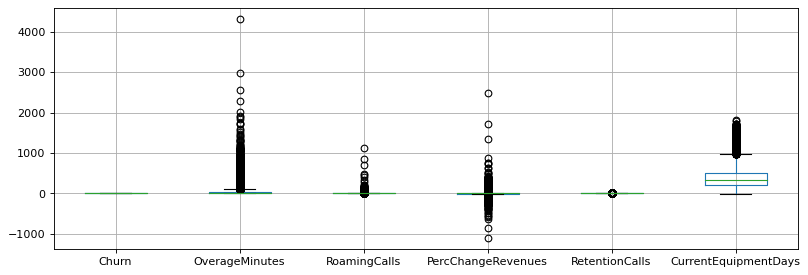

In [36]:
plt.figure(figsize=(12,4), dpi=80)
df2[['Churn', 'OverageMinutes', 'RoamingCalls', 
     'PercChangeRevenues', 'RetentionCalls', 'CurrentEquipmentDays']].boxplot()

The ranges of the values of features are pretty large. We will need to transform the data using MinMaxScaler later

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'MonthlyRevenue'}>,
        <AxesSubplot:title={'center':'MonthlyMinutes'}>,
        <AxesSubplot:title={'center':'TotalRecurringCharge'}>,
        <AxesSubplot:title={'center':'DirectorAssistedCalls'}>,
        <AxesSubplot:title={'center':'OverageMinutes'}>,
        <AxesSubplot:title={'center':'RoamingCalls'}>,
        <AxesSubplot:title={'center':'PercChangeMinutes'}>],
       [<AxesSubplot:title={'center':'PercChangeRevenues'}>,
        <AxesSubplot:title={'center':'DroppedCalls'}>,
        <AxesSubplot:title={'center':'BlockedCalls'}>,
        <AxesSubplot:title={'center':'UnansweredCalls'}>,
        <AxesSubplot:title={'center':'CustomerCareCalls'}>,
        <AxesSubplot:title={'center':'ThreewayCalls'}>,
        <AxesSubplot:title={'center':'ReceivedCalls'}>,
        <AxesSubplot:title={'center':'OutboundCalls'}>],
       [<AxesSubplot:title={'center':'InboundCalls'}>,
        <AxesSubplot:titl

<Figure size 960x640 with 0 Axes>

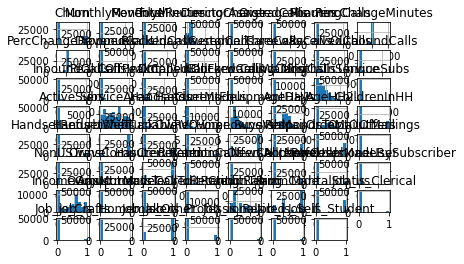

In [37]:
plt.figure(figsize=(12,8), dpi=80)
df2.hist()

# Feature Engineering

## Data Transformation

In [38]:
# extract features and use min max scaler to rescale the data to the same range
features = df2.drop(columns=['Churn'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([-1, 1])
scaler.fit(features)
print("The transformed data: ", scaler.transform(features))
features = pd.DataFrame(scaler.transform(features), columns=features.columns)
features.head()

The transformed data:  [[-0.951 -0.94  -0.862 ... -1.    -1.    -1.   ]
 [-0.962 -0.997 -0.887 ... -1.    -1.    -1.   ]
 [-0.928 -0.998 -0.783 ... -1.    -1.    -1.   ]
 ...
 [-0.873 -0.803 -0.626 ... -1.    -1.    -1.   ]
 [-0.799 -0.896 -0.823 ... -1.    -1.    -1.   ]
 [-0.835 -0.526 -0.552 ... -1.    -1.    -1.   ]]


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,MaritalStatus,Job_is_Clerical,Job_is_Crafts,Job_is_Homemaker,Job_is_Other,Job_is_Professional,Job_is_Retired,Job_is_Self,Job_is_Student
0,-0.951,-0.940,-0.862,-0.997,-1.0,-1.0,-0.180,-0.394,-0.994,-0.996,-0.985,-1.000,-1.000,-0.928,-1.000,-1.000,-0.945,-0.967,-0.992,-1.0,-0.997,1.000,-0.99,-0.962,0.762,-0.913,-0.857,-0.597,0.253,-1.000,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-0.5,-1.0,-1.0,-1.0,-1.0,-0.111,-1.0,-1.00,1.0,-1.000,-0.333,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,-0.962,-0.997,-0.887,-1.000,-1.0,-1.0,-0.146,-0.383,-0.997,-1.000,-0.994,-1.000,-1.000,-1.000,-1.000,-1.000,-0.995,-0.999,-0.998,-1.0,-1.000,0.891,-1.00,-0.962,0.633,-0.913,-1.000,0.661,-0.192,-0.152,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.111,-1.0,-1.00,-1.0,0.000,-0.333,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.928,-0.998,-0.783,-1.000,-1.0,-1.0,-0.146,-0.383,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.999,-1.000,-0.999,-0.995,-1.000,-1.0,-1.000,0.964,-1.00,-0.962,-0.058,-1.000,-1.000,1.000,-0.475,-0.475,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.333,-1.0,-1.00,-1.0,-0.333,-1.000,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.856,-0.643,-0.601,-0.984,-1.0,-1.0,-0.111,-0.379,-0.531,-0.953,-0.821,-0.974,-0.961,-0.851,0.149,-0.434,-0.468,-0.588,-0.648,-1.0,-0.787,0.927,-0.99,-0.925,0.633,-0.304,-0.571,-0.490,-0.394,-1.000,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.333,-1.0,-1.00,-1.0,0.000,1.000,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
4,-0.962,-1.000,-0.887,-1.000,-1.0,-1.0,-0.145,-0.383,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,0.709,-0.99,-0.925,0.507,-0.739,-0.714,-0.057,-0.071,0.091,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.000,-1.0,-0.92,-1.0,-1.000,1.000,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0


## Dealing with imbalanced data set

we have imbalanced dataset: 14257 churn vs 35519 non-churn


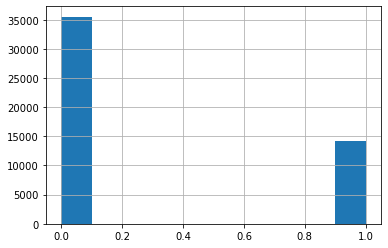

In [39]:
df2.Churn.hist()
print('we have imbalanced dataset: {} churn vs {} non-churn'.format(
    len(df2[df2.Churn == 1]), len(df2[df2.Churn == 0])))

Again since we have around 14k of data for churn, we can afford to drop additional non-churn data to make the dataset balanced.

Why do we need to make dataset balanced? This is to prevent cost function from being optimized towards non-churn data and balanced dataset makes prediction accuracy easier to interpret

In [40]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
rus = RandomUnderSampler(sampling_strategy='majority', random_state=8017)
X_resampled, y_resampled = rus.fit_resample(features, df2.Churn)
y_resampled.value_counts()

1    14257
0    14257
Name: Churn, dtype: int64

## Splitting data into training and testing set

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                random_state=8017, stratify=y_resampled,
                                                test_size=0.3)

## Feature Selection based on feature Importances

In [43]:
from sklearn.linear_model import LinearRegression, Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

for score, feature in zip(lasso.coef_, X_train.columns):
    if score != 0:
        print(score, feature)

0.06854244725162596 CurrentEquipmentDays
0.00841651270217948 HandsetRefurbished
-0.01635351837391362 HandsetWebCapable
-0.004329412284447082 RespondsToMailOffers
0.0241754874220022 MadeCallToRetentionTeam
-0.006154647439521429 CreditRating


According to Lasso, CurrentEquipmentDays, HandsetRefurbished, HandsetWebCapable,
RespondsToMailOffers, MadeCallToRetentionTeam, CreditRating are the important features

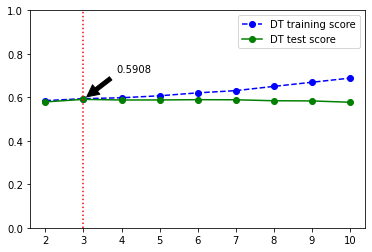

In [45]:
from sklearn.tree import DecisionTreeClassifier

train_single_scores = []
test_single_scores = []
for depth in range(2, 11):
    clf = DecisionTreeClassifier(
        criterion='gini', max_depth=depth, random_state=8017)
    clf.fit(X_train, y_train)
    train_single_scores.append(clf.score(X_train, y_train))
    test_single_scores.append(clf.score(X_test, y_test))

plt.plot(train_single_scores, "go--", color="blue")
plt.plot(test_single_scores, "go-")
plt.ylim(0, 1)
plt.xticks(range(9), range(2, 11))
plt.legend(["DT training score", "DT test score"])
plt.axvline(np.argmax(test_single_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_single_scores).round(4), (np.argmax(test_single_scores), np.max(test_single_scores)), xycoords="data",
             xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
             horizontalalignment="center", verticalalignment="bottom")
plt.show()

In [47]:
classification_tree = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=8017)
classification_tree.fit(X_train, y_train)
classification_tree.score(X_train, y_train)
pred_train_dtc = classification_tree.predict_proba(X_train)
pred_test_dtc = classification_tree.predict_proba(X_test)

# print the `feature_importances_`
for score, feature in zip(classification_tree.feature_importances_, X_train.columns):
    if score != 0:
        print(score, feature)

0.06042224793374392 MonthlyMinutes
0.04545211442462974 TotalRecurringCharge
0.3311806895707951 MonthsInService
0.5629449480708312 CurrentEquipmentDays


According to decision tree with max_depth=3, MonthlyMinutes, TotalRecurringCharge, MonthsInService,
CurrentEquipmentDays are important features

## Dimensionality Reduction using PCA

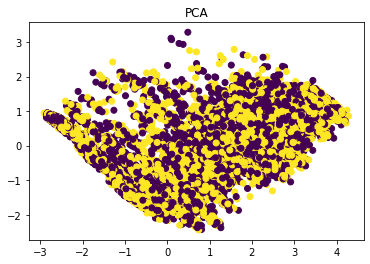

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.title('PCA', fontdict=None, loc='center', pad=None)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y_train)

The dots aren't clearly separated..

# Training the model
hyperparameters and predict generalization performance using cross validation. Use F1-score as a performance measure

Performance metrics: 

In [54]:
# let's assume that we only take signicant features from lasso and decision tree
importantFeatures = [
    'MonthlyMinutes', 'TotalRecurringCharge', 'MonthsInService',
    'CurrentEquipmentDays', 'HandsetRefurbished', 'HandsetWebCapable',
    'RespondsToMailOffers', 'MadeCallToRetentionTeam', 'CreditRating'
]

X_train2 = X_train[importantFeatures]
X_test2 = X_test[importantFeatures]
X_train2.head()

,MonthlyMinutes,TotalRecurringCharge,MonthsInService,CurrentEquipmentDays,HandsetRefurbished,HandsetWebCapable,RespondsToMailOffers,MadeCallToRetentionTeam,CreditRating
10846,-0.998,-0.887,0.164,-0.165,-1.0,-1.0,-1.0,-1.0,0.333
19567,-0.978,-0.823,-0.455,-0.300,-1.0,-1.0,-1.0,-1.0,-0.667
28417,-0.815,-0.921,0.018,0.134,-1.0,-1.0,-1.0,-1.0,-1.000
2120,-0.875,-0.823,-0.309,-0.172,-1.0,1.0,1.0,-1.0,-0.667
5895,-0.574,-0.675,-0.745,-0.928,1.0,1.0,-1.0,-1.0,-0.667


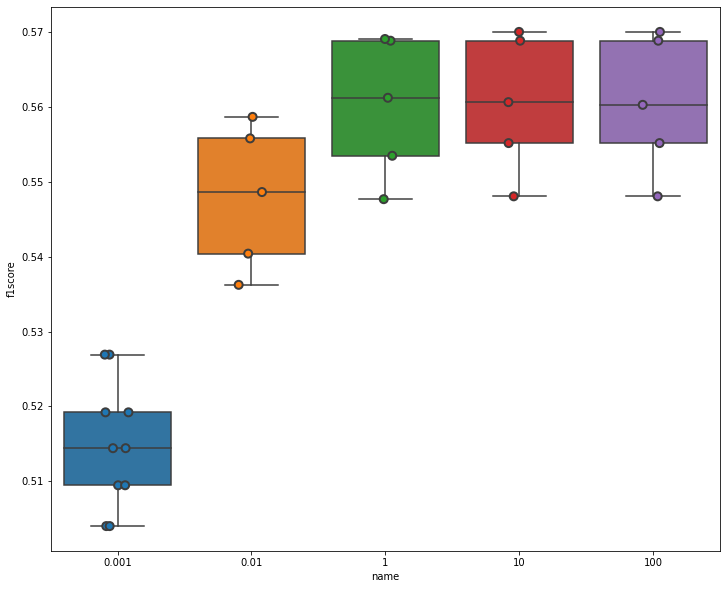

In [56]:
# let's do a quick comparison on different models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# first logistic regression
Cs = [1e-3,0.001,0.01,1,10,100]
models = [LogisticRegression(C=c, solver='liblinear') for c in Cs]
scores = []

for C, model in zip(Cs, models):
    model_name = str(C)
    model_scores = cross_val_score(estimator=model, X=X_train2,
                                   y=y_train, cv=5, scoring='f1')
    for fold_idx, score in enumerate(model_scores):
        scores.append((model_name, fold_idx, score))

cv_df = pd.DataFrame(scores, columns=['name', "fold_idx", "f1score"])

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x='name', y='f1score', data=cv_df)
sns.stripplot(x='name', y='f1score', data=cv_df, size=8, jitter=True, edgecolor='gray', linewidth=2)
plt.show()

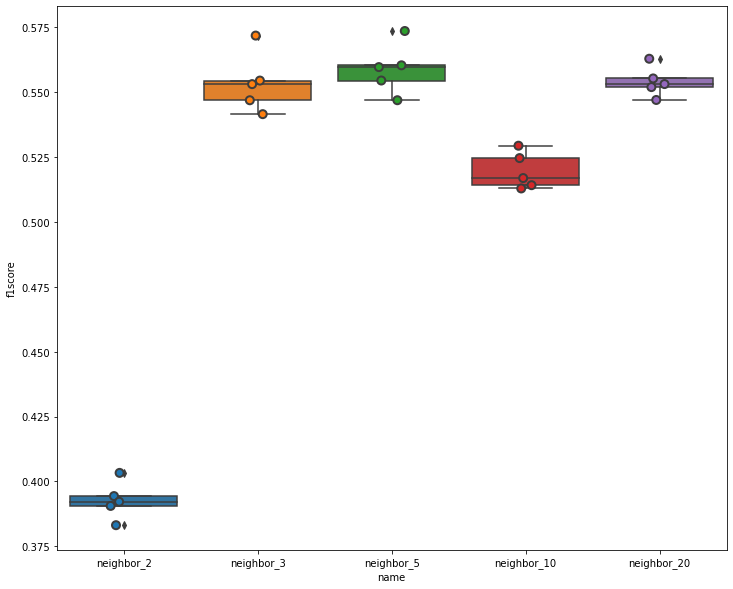

In [57]:
# second KNNs here
neighbors = [2, 3, 5, 10, 20]
knn_names = ['neighbor_{}'.format(n) for n in neighbors]
models = [KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski') for n in neighbors]

scores = []

for name, model in zip(knn_names, models):
    model_name = name
    model_scores = cross_val_score(estimator=model, X=X_train2, 
                                   y=y_train, cv=5, scoring='f1')
    for fold_idx, score in enumerate(model_scores):
        scores.append((model_name, fold_idx, score))

cv_df = pd.DataFrame(scores, columns=['name', "fold_idx", "f1score"])

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x='name', y='f1score', data=cv_df)
sns.stripplot(x='name', y='f1score', data=cv_df, size=8, jitter=True, edgecolor='gray', linewidth=2)
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

lr = LogisticRegression(C=1, solver='liblinear')
ppn = Perceptron(eta0=0.1, random_state=1)
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
svm = SVC(kernel='linear', C=1, random_state=1)
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
nb = GaussianNB()

models = [lr, ppn, knn, svm, forest, nb]
scores = []

for model in models:
    model_name = model.__class__.__name__
    model_scores = cross_val_score(estimator=model, X=X_train2, y=y_train, cv=10, scoring='f1')
    for fold_idx, score in enumerate(model_scores):
        scores.append((model_name, fold_idx, score))

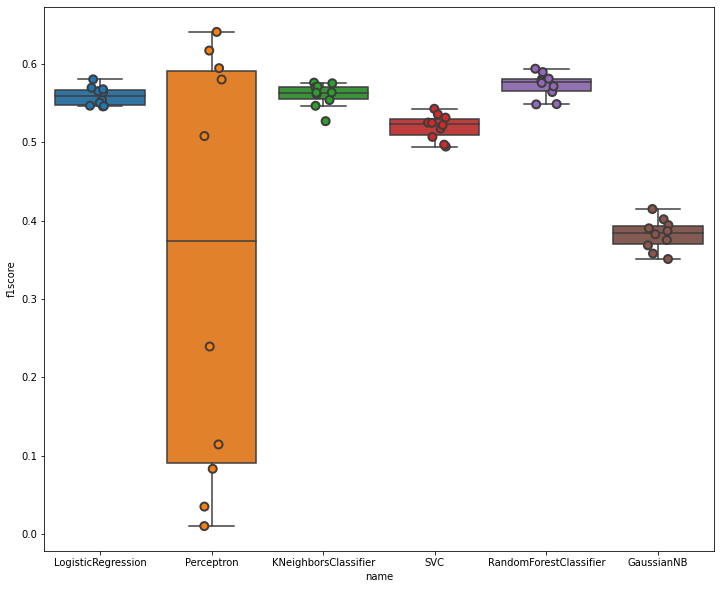

In [59]:
cv_df = pd.DataFrame(scores, columns=['name', "fold_idx", "f1score"])

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x='name', y='f1score', data=cv_df)
sns.stripplot(x='name', y='f1score', data=cv_df, size=8, jitter=True, edgecolor='gray', linewidth=2)
plt.show()

In [63]:
# let's try the most powerful classifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {'n_estimators': [100, 500, 1000],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 4, 5,6],
              'learning_rate': [0.1,0.01,0.02,0.05]}
xgb = XGBClassifier(tree_method = 'gpu_hist',predictor='gpu_predictor')
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, verbose = 2)
xgb_cv_model.fit(X_train2, y_train)
print("The best parameters are : ",xgb_cv_model.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[00:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[00:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.6s
[00:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[00:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[00:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[00:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[00:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[00:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[00:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[00:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[00:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[00:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[00:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[00:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[00:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[00:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   2.4s
[00:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   2.1s
[00:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   2.0s
[00:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jorda\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KeyboardInterrupt: 

In [ ]:
xgb = XGBClassifier(learning_rate = xgb_cv_model.best_params_['learning_rate'], 
                    max_depth = xgb_cv_model.best_params_['max_depth'], 
                    n_estimators = xgb_cv_model.best_params_['n_estimators'], 
                    subsample = xgb_cv_model.best_params_['subsample'],
                    tree_method = 'gpu_hist',predictor='gpu_predictor')

xgb_tuned =  xgb.fit(X_train2,y_train)
y_pred = xgb_tuned.predict(X_test2)